# Excercise 4: <br /> Understand and Clean a Dataset

## Import data

### Load Packages

In [52]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

### Load Data into Dataframe

In [37]:
data = pd.read_csv('building_dataset.csv')
df = pd.DataFrame(data)

df

,Area,Height,Age,Num_Floors,Location,Material,Label
0,1360,19,26,9,5,2,4
1,4272,20,11,4,3,1,1
2,3592,18,35,6,2,2,4
3,966,15,8,2,3,1,4
4,4926,10,46,6,3,2,0
...,...,...,...,...,...,...,...
995,3261,18,26,2,1,1,4
996,3179,18,5,8,1,1,4
997,2606,4,35,6,2,1,0
998,4723,13,28,3,5,1,0


## Understand Dataset

In [38]:
# Number of samples
print("Number of samples: ", df.shape[0])
# Number of features
print("Number of features: ", df.shape[1])
# Label and datatype of each feature
features = {}
for column in df.columns:
    features[column] = df[column].dtype
print("Features and their datatypes: ", features)

# Visualize one sample
df.sample(1)

Number of samples:  1000
Number of features:  7
Features and their datatypes:  {'Area': dtype('int64'), 'Height': dtype('int64'), 'Age': dtype('int64'), 'Num_Floors': dtype('int64'), 'Location': dtype('int64'), 'Material': dtype('int64'), 'Label': dtype('int64')}


,Area,Height,Age,Num_Floors,Location,Material,Label
293,1024,5,24,8,3,2,0


## General Statistics

In [39]:
# Compute mean, median, mode and standard deviation of numerical features
statistics = {
    # Explanation of statistics:
    # Mean: The average value of each numerical feature.
    # Median: The middle value of each numerical feature when sorted.
    # Mode: The most frequently occurring value of each numerical feature.
    # Std Dev: The standard deviation, representing the spread or variability of each numerical feature.
    'Mean': df[['Area', 'Height', 'Age', 'Num_Floors']].mean(),
    'Median': df[['Area', 'Height', 'Age', 'Num_Floors']].median(),
    'Mode': df[['Area', 'Height', 'Age', 'Num_Floors']].mode().iloc[0],
    'Std Dev': df[['Area', 'Height', 'Age', 'Num_Floors']].std()
}

pd.DataFrame(statistics)

,Mean,Median,Mode,Std Dev
Area,2815.422,2862.5,1743.0,1255.514921
Height,15.477,15.0,13.0,8.067252
Age,24.688,24.0,21.0,14.015816
Num_Floors,4.996,5.0,3.0,2.608983


Unique values in categorical features:  {'Location': array([5, 3, 2, 4, 1]), 'Material': array([2, 1, 3]), 'Label': array([4, 1, 0, 3, 2])}


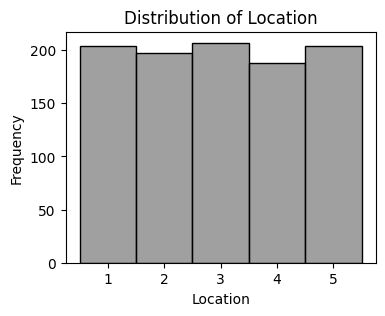

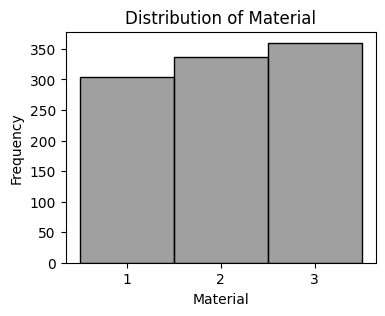

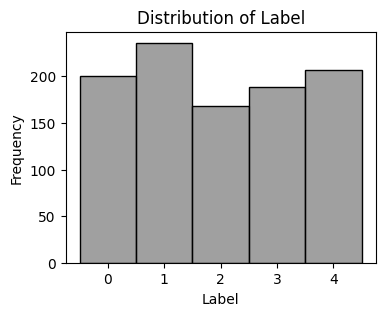

In [49]:
# Unique values in categorical features
unique_values = {
    'Location': df['Location'].unique(),
    'Material': df['Material'].unique(),
    'Label': df['Label'].unique()
}
print("Unique values in categorical features: ", unique_values)

# Plot histograms with distribution curves
for feature in ['Location', 'Material', 'Label']:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[feature], kde=False, binwidth=1, binrange=(df[feature].min() - 0.5, df[feature].max() + 0.5), color='grey')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency') 
    plt.xticks(ticks=range(df[feature].min(), df[feature].max() + 1))  # Ensure integer x-axis values
    plt.show()


## Data Quality

In [43]:
# Missing values
df.isnull().sum()

Area          0
Height        0
Age           0
Num_Floors    0
Location      0
Material      0
Label         0
dtype: int64

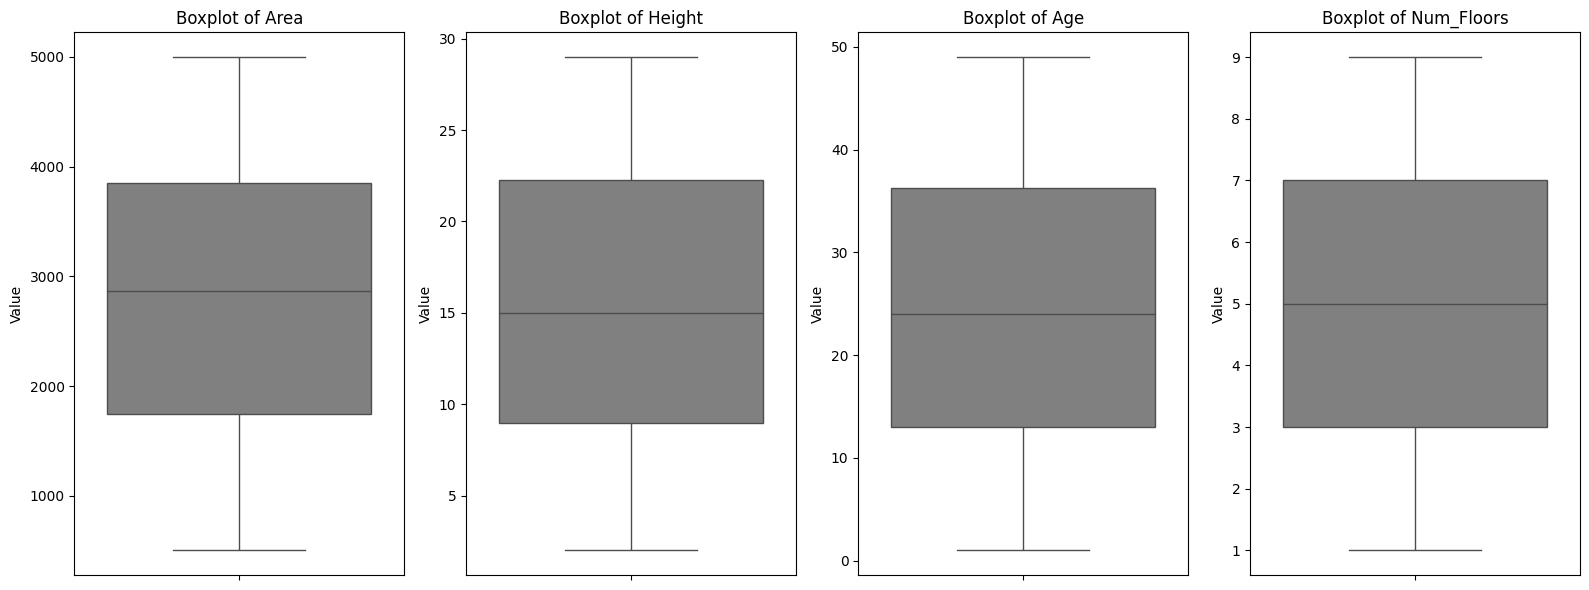

In [48]:
# Boxplots for numerical features in subplots with outliers as diamonds
numerical_features = ['Area', 'Height', 'Age', 'Num_Floors']
num_features = len(numerical_features)

fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(16, 6), sharey=False)

for i, feature in enumerate(numerical_features):
    sns.boxplot(
        data=df, 
        y=feature, 
        ax=axes[i], 
        flierprops=dict(marker='D', color='red', markersize=6),
        color='grey'
    )
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


## Feature Correlations

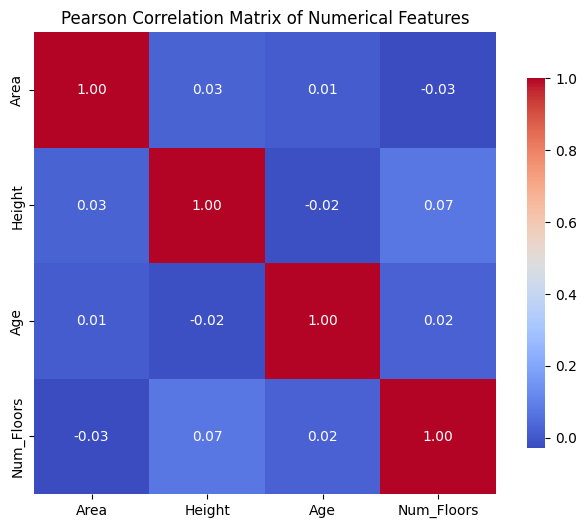

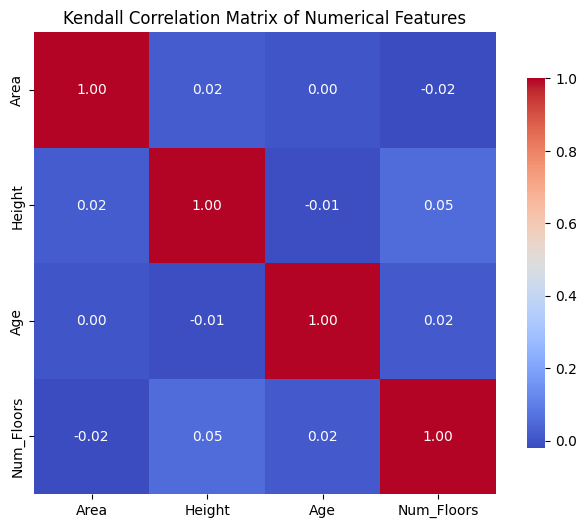

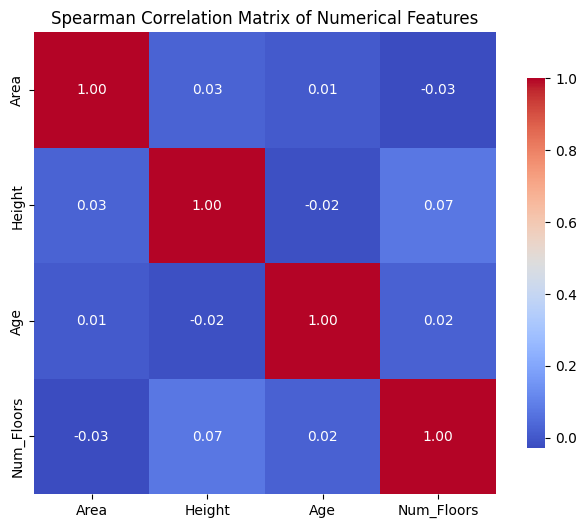

In [53]:
# Calculate correlation matrices using different methods
correlation_methods = ['pearson', 'kendall', 'spearman']
correlation_matrices = {method: df[['Area', 'Height', 'Age', 'Num_Floors']].corr(method=method) for method in correlation_methods}

# Plot heatmaps for each correlation matrix
for method, matrix in correlation_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
    plt.title(f'{method.capitalize()} Correlation Matrix of Numerical Features')
    plt.show()

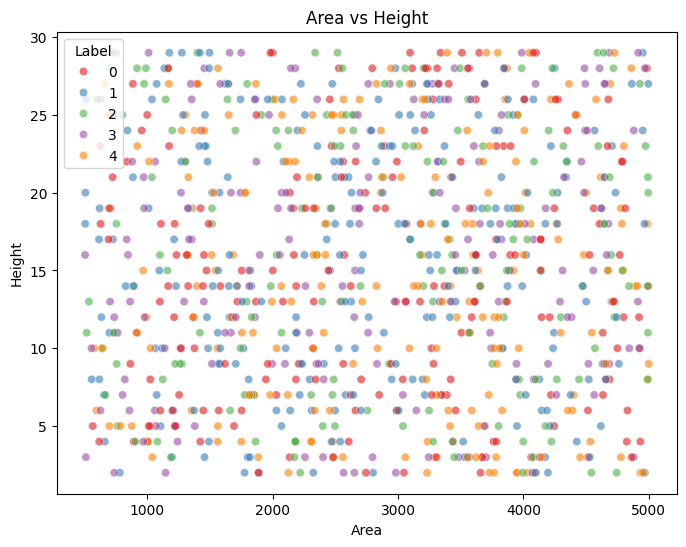

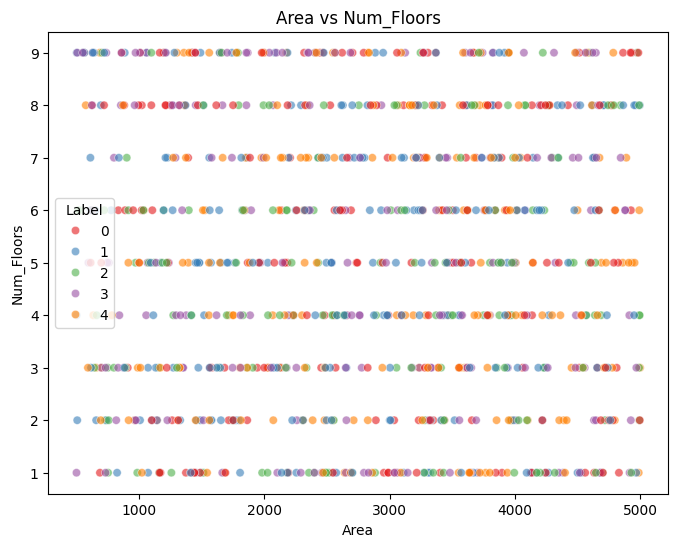

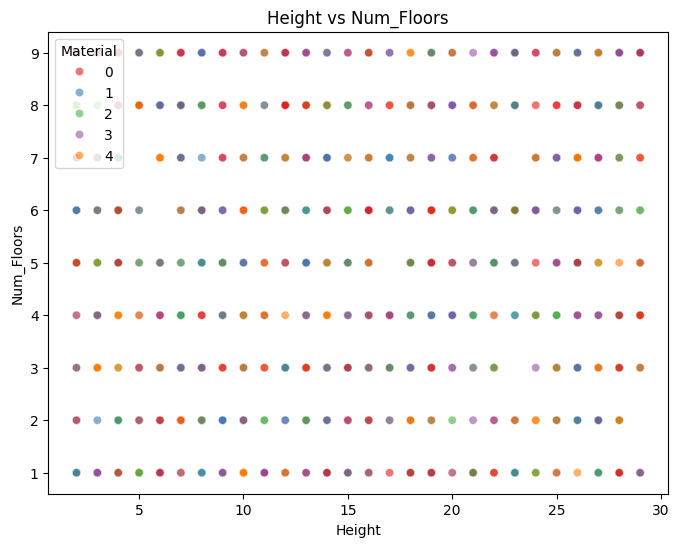

In [59]:
# Scatter plots for numerical features
# Area vs Height
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Area', y='Height', hue='Label', palette='Set1', alpha=0.6)
plt.title('Area vs Height')
plt.xlabel('Area')
plt.ylabel('Height')
plt.legend(title='Label')
plt.show()

# Area vs Num_Floors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Area', y='Num_Floors', hue='Label', palette='Set1', alpha=0.6)
plt.title('Area vs Num_Floors')
plt.xlabel('Area')
plt.ylabel('Num_Floors')
plt.legend(title='Label')
plt.show()

# Height vs Num_Floors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Num_Floors', hue='Label', palette='Set1', alpha=0.6)
plt.title('Height vs Num_Floors')
plt.xlabel('Height')
plt.ylabel('Num_Floors')
plt.legend(title='Material')
plt.show()

In [61]:
# Find data points that are suspicious
suspicious_points = df[(df['Height'] > 20) & (df['Num_Floors'] < 2)]
suspicious_points

,Area,Height,Age,Num_Floors,Location,Material,Label
16,3404,27,6,1,1,3,0
41,3324,22,16,1,1,3,1
56,3113,27,48,1,1,1,1
62,1495,29,35,1,2,1,1
133,1163,28,34,1,3,1,2
172,3897,23,45,1,4,2,0
184,988,28,41,1,3,2,2
187,2885,21,13,1,4,3,2
230,2027,24,8,1,5,3,2
238,2193,21,40,1,5,1,0
